# Lab 5 (Hopfield Networks)
IP-01 Kovalenko M., Kapshuk M.

## Prepare

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [35]:
# Useful functions
def Thresh(x):
    val = np.ones_like(x)
    val[x < 0] = -1.
    return val

def Hamming(x, y):
    d = []
    for xx, yy in zip(x,y):
        dd = 0.
        for xxx,yyy in zip(xx,yy):
            if xxx * yyy < 0:
                dd += 1.
        d.append(dd)
    return d

def Damage(x, p = 0.1):
    y = copy.deepcopy(x)
    for yy in y:
        for k in range(len(yy)):
            if np.random.rand() < p:
                yy[k] = np.random.randint(2) * 2 - 1
    return y

## Load dataset

In [36]:
# 4 Orthogonal Vectors
X = np.array([[ 1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
              [ 1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1],
              [ 1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1],
              [ 1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1],
             ])
N = np.shape(X)[1]
n = 4

In [37]:
X.shape

(4, 16)

## Set up network

In [38]:
# (Pseudo-)Orthogonality
print(X@X.T)

[[16  0  0  0]
 [ 0 16  0  0]
 [ 0  0 16  0]
 [ 0  0  0 16]]


In [39]:
# Connection weights and biases
b = np.zeros((1, N))
b = np.sum(X, axis=0) / n
W = (X.T @ X) / n - np.eye(N)

(-0.5, 15.5, 15.5, -0.5)

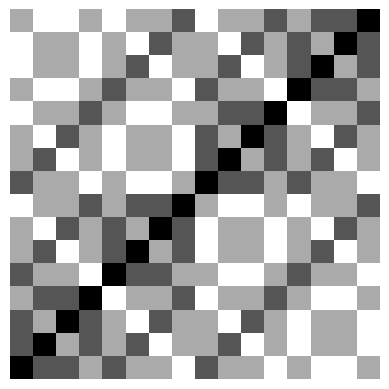

In [40]:
plt.imshow(W, cmap='gray')
plt.axis('off')

In [41]:
def Update(W, x, b):
    xnew = x @ W - b
    return Thresh(xnew)

## Test

In [42]:
# Perturbed memory
k = np.random.randint(len(X))
Y = Damage(X , p = 0.4)
x = Y[k:k+1,]
err = Hamming(x, X[k:k+1,:])
print('Class '+str(k)+' with '+str(err)+' errors')
x_orig = copy.deepcopy(x)
print(x_orig)

Class 3 with [6.0] errors
[[-1  1  1 -1  1  1 -1  1  1 -1 -1 -1  1 -1  1 -1]]


## Iterate Network (to steady state)

In [43]:
x = copy.deepcopy(x_orig)
n_iters = 10
for k in range(n_iters):
    print(x)
    x_new = Update(W, x, b)
    print(Hamming(x, x_new))
    x = x_new

[[-1  1  1 -1  1  1 -1  1  1 -1 -1 -1  1 -1  1 -1]]
[9.0]
[[ 1. -1. -1. -1.  1.  1.  1. -1. -1. -1. -1. -1.  1.  1. -1.  1.]]
[3.0]
[[-1. -1. -1. -1.  1.  1.  1.  1. -1. -1. -1. -1.  1.  1.  1.  1.]]
[0.0]
[[-1. -1. -1. -1.  1.  1.  1.  1. -1. -1. -1. -1.  1.  1.  1.  1.]]
[0.0]
[[-1. -1. -1. -1.  1.  1.  1.  1. -1. -1. -1. -1.  1.  1.  1.  1.]]
[0.0]
[[-1. -1. -1. -1.  1.  1.  1.  1. -1. -1. -1. -1.  1.  1.  1.  1.]]
[0.0]
[[-1. -1. -1. -1.  1.  1.  1.  1. -1. -1. -1. -1.  1.  1.  1.  1.]]
[0.0]
[[-1. -1. -1. -1.  1.  1.  1.  1. -1. -1. -1. -1.  1.  1.  1.  1.]]
[0.0]
[[-1. -1. -1. -1.  1.  1.  1.  1. -1. -1. -1. -1.  1.  1.  1.  1.]]
[0.0]
[[-1. -1. -1. -1.  1.  1.  1.  1. -1. -1. -1. -1.  1.  1.  1.  1.]]
[0.0]


## How close are we to recalling a memory?

In [44]:
for idx,t in enumerate(X):
    d = Hamming(x, [t])[0]
    print('Memory ' + str(idx) + ' has error ' + str(d))

Memory 0 has error 8.0
Memory 1 has error 16.0
Memory 2 has error 8.0
Memory 3 has error 8.0
